<div style="background-color:#B43757; color:white; padding:15px;">
<h1> HOW TEMPORAL EXPECTATIONS (Short vs Long) IMPACT NEURAL DYNAMICS
<left>
</div>

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sc
import numpy as np
import mat73

In [21]:
sns.set(font='DejaVu Sans',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'grid.color': '.8',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":10,
                                "axes.titlesize":12,
                                "axes.labelsize":10})
sns.set_palette("colorblind")

In [22]:
def abline(slope, intercept, **kwargs):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', **kwargs)

In [23]:
def abline_ax(slope, intercept, i, j, **kwargs):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    ax_array[i][j].plot(x_vals, y_vals, '--', **kwargs)

In [24]:
# Load data set
allData = mat73.loadmat('./RSG-spikepatterns/Data/G_Ready-Set_bin1ms_alignedReady.mat')
# allData = mat73.loadmat('./RSG-spikepatterns/Data/H_Ready-Set_bin1ms_alignedReady.mat')

In [25]:
allData.keys()

dict_keys(['D', 'id_eye', 'id_left', 'id_neuron', 'id_short', 'id_trial', 'sp_times', 't_p', 't_s', 'wbin'])

In [26]:
sessions = len(allData['D'])
session = 0
nTime, nNeurons, nTrials = allData['D'][session].shape

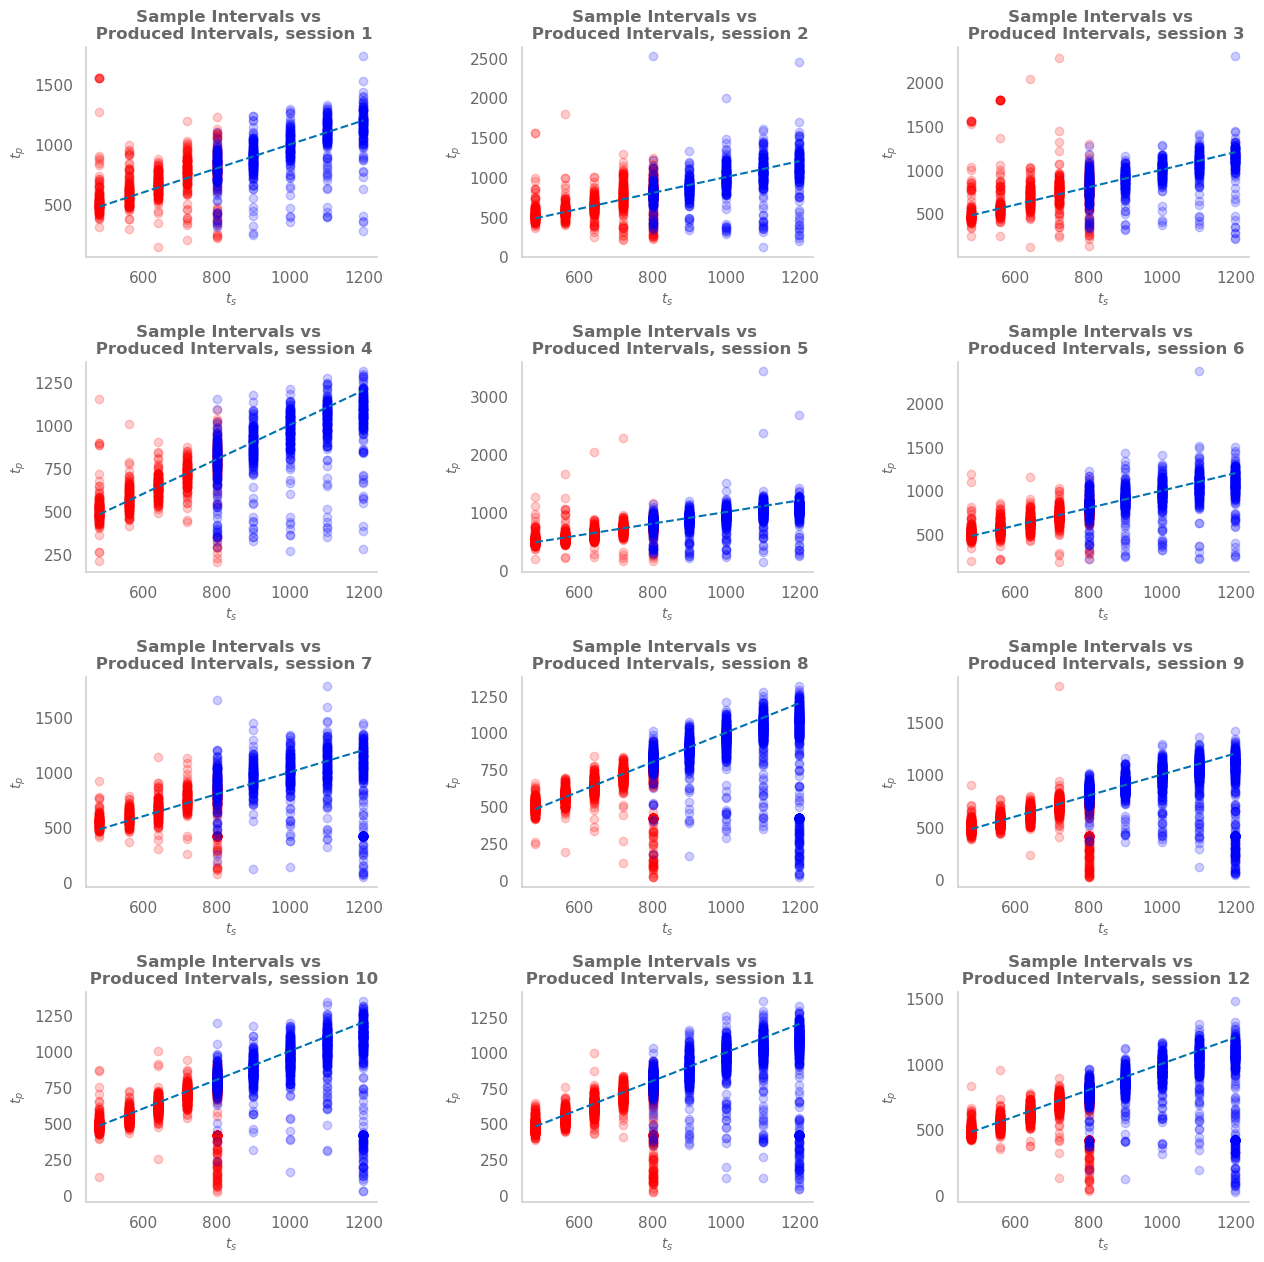

In [27]:
fig, ax_array = plt.subplots(4, 3, figsize=(15, 15))#, squeeze = False)
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

for i, ax_row in enumerate(ax_array):
    for j, axes in enumerate(ax_row):
        session = i*3 + j
        #####
        ## Unity line
        x_vals = np.array([min(allData['t_s'][session][allData['id_short'][session]]), max(allData['t_s'][session][allData['id_short'][session] == False])])
        intercept, slope = 0, 1
        y_vals = intercept + slope * x_vals
        ax_array[i][j].plot(x_vals, y_vals, '--')
        #####
        ## Scatter the data
        ax_array[i][j].scatter(allData['t_s'][session][allData['id_short'][session]], allData['t_p'][session][allData['id_short'][session]], 
            color = 'red', alpha = 0.2, label = 'Short')
        ax_array[i][j].scatter(allData['t_s'][session][allData['id_short'][session] == False], allData['t_p'][session][allData['id_short'][session] == False], 
            color = 'blue', alpha = 0.2, label = 'Long')
        ax_array[i][j].set_title('Sample Intervals vs \n Produced Intervals, session {}'.format(session + 1), fontweight = 'bold')
        ax_array[i][j].set_xlabel('$t_s$')
        ax_array[i][j].set_ylabel('$t_p$')
        
        #neuron = (10 * i) + j
    

In [28]:
sessions = len(allData['D'])
session = 0
nTime, nNeurons, nTrials = allData['D'][session].shape

## Trial average activity as a function of time

Data is encoded in a tensor as follows:

`time x neurons x trials`

for session 1:

`1200 x 107 x 1498`

Supposed to be `[TxNxK]`, the spiking activity of **N** neurons, across **K** trials and **T** times points.

In [29]:
t_s_max = 1200
dt = 100

timepoints = np.arange(dt, t_s_max + 1, dt, dtype = int)

shortTimes = timepoints[timepoints < 800] # np.array([480, 560, 640, 720, 800])
longTimes = timepoints # np.array([800, 900, 1000, 1100, 1200])

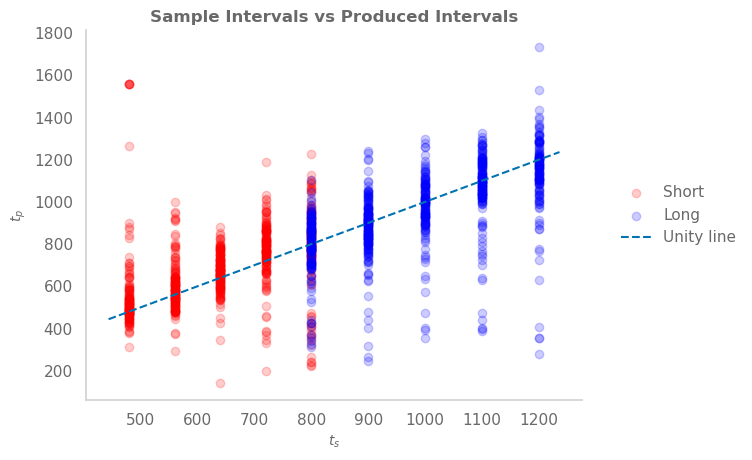

In [30]:
plt.scatter(allData['t_s'][session][allData['id_short'][session]], allData['t_p'][session][allData['id_short'][session]], 
            color = 'red', alpha = 0.2, label = 'Short')
plt.scatter(allData['t_s'][session][allData['id_short'][session] == False], allData['t_p'][session][allData['id_short'][session] == False], 
            color = 'blue', alpha = 0.2, label = 'Long')
abline(1, 0, label = 'Unity line')
plt.title('Sample Intervals vs Produced Intervals', fontweight = 'bold')
plt.xlabel('$t_s$')
plt.ylabel('$t_p$')
plt.legend(frameon = False, loc = 'center left', bbox_to_anchor = (1.05, 0.5))
plt.show()

In [31]:
shortMask = allData['id_short'][session]
longMask = allData['id_short'][session] == False

In [32]:
allData['D'][session].shape

(1200, 107, 1498)

In [33]:
# Subset Data according to short or long ts

#### Short
shortData = allData['D'][session][:, :, shortMask][:800, :, :] ## Slice at time 800 since after that, there are no data -> NaN's

#### Long
longData = allData['D'][session][:, :, longMask]

In [34]:
# Average data across trials
shortData_mean = np.nanmean(shortData, axis = 2)
longData_mean = np.nanmean(longData, axis = 2)

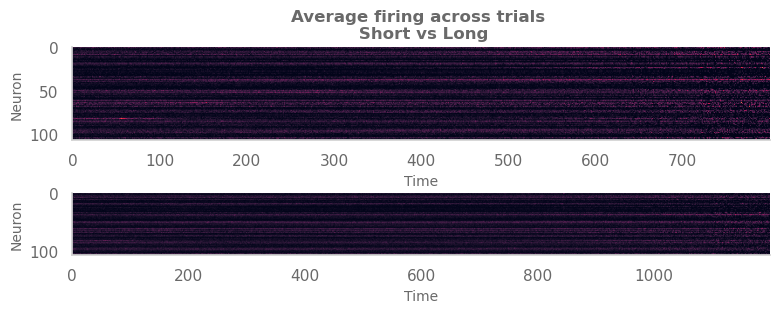

In [35]:
fig = plt.figure(figsize = (9,3))
fig.subplots_adjust(hspace = 0.3)

plt.subplot(211)
plt.imshow(shortData_mean.T)
plt.title('Average firing across trials \n Short vs Long', fontweight = 'bold')
plt.xlabel('Time')
plt.ylabel('Neuron')

plt.subplot(212)
plt.imshow(longData_mean.T)
plt.xlabel('Time')
plt.ylabel('Neuron')

plt.show()

## Smoothing with uniform or gaussion filter 1d

In [36]:
from scipy.ndimage import gaussian_filter1d, uniform_filter1d

def rollavg(Z, N, mode = 'reflect', gaussian = True):      # rolling average on N time steps
 #   Zavg=np.convolve(Z, np.ones((N,))/N, mode=mode)
    if gaussian:
        Zavg = gaussian_filter1d(Z, sigma = N, mode = mode)
    else:
        Zavg = uniform_filter1d(Z, size = N, mode = mode)
    
 #   n=int(N/2.); Zavg[range(n)]=Zavg[n+1]; Zavg[range(-1,-n-1,-1)]= Zavg[-n]
 #   if mode=='valid': Z=Z[0: len(Z)-N+1];# Z=Z[0: len(Z)-N+1]
    return Z, Zavg

In [37]:
shortData_mean.shape

(800, 107)

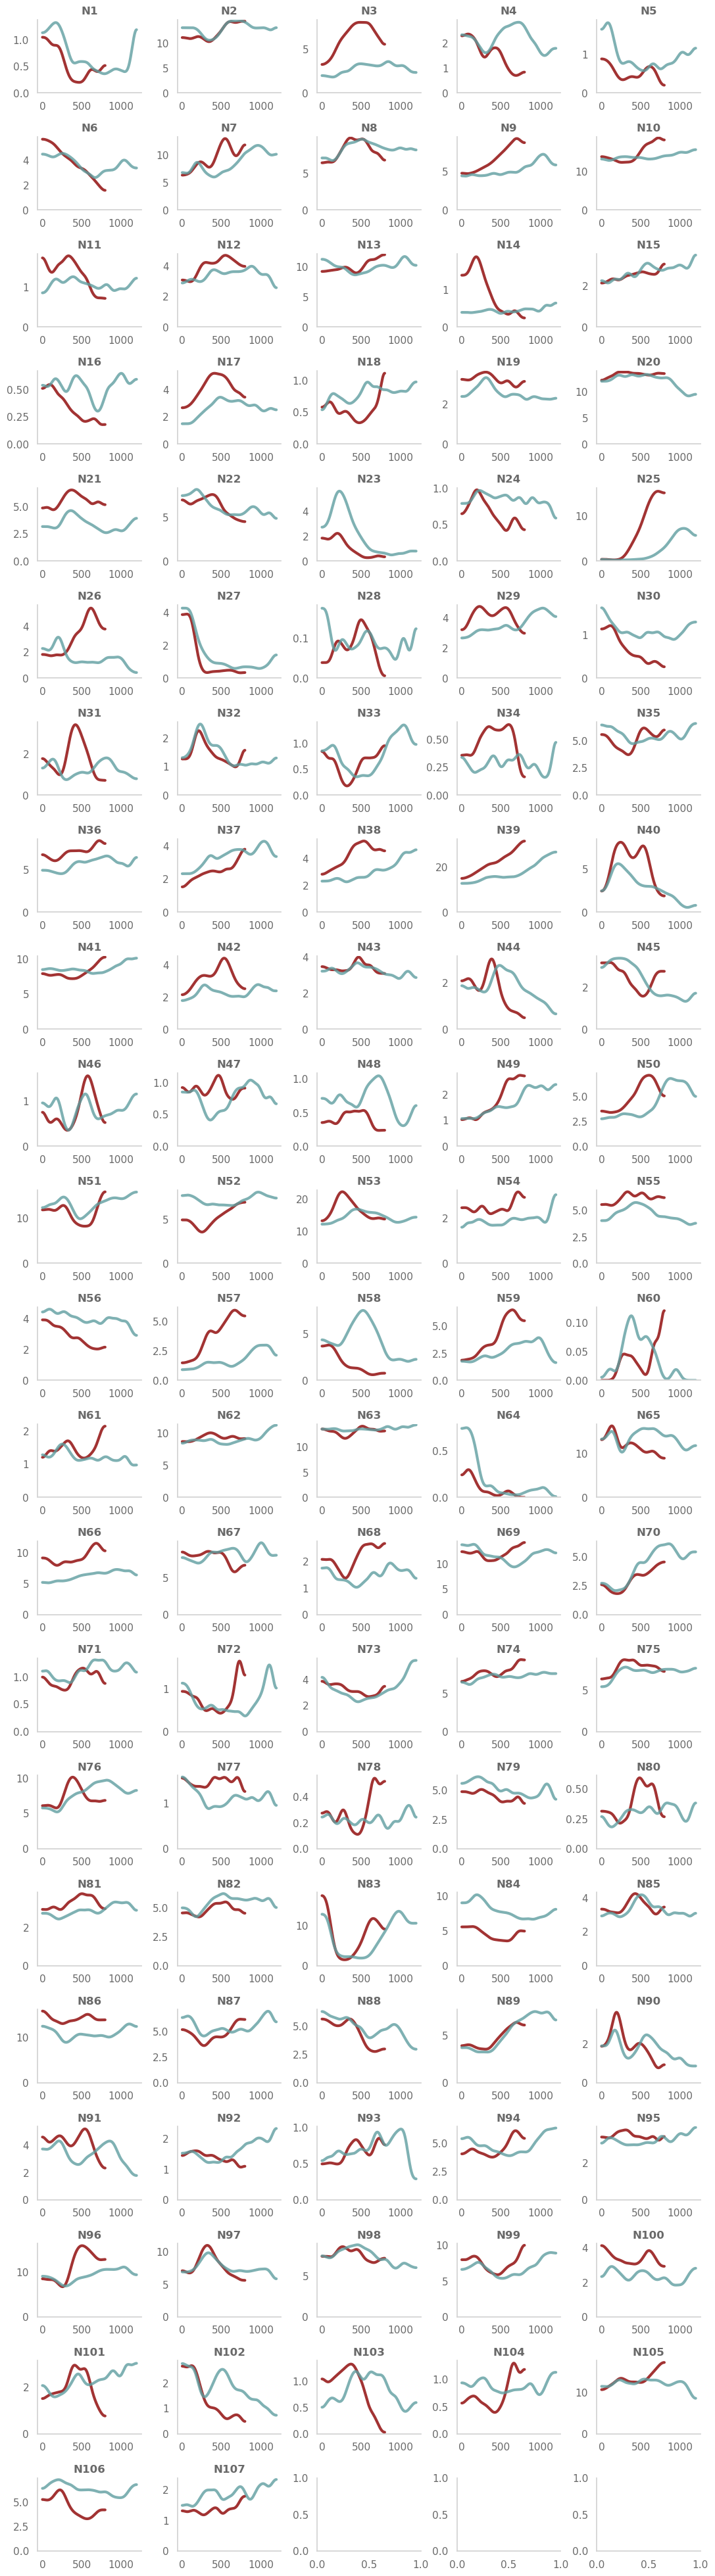

In [38]:
N = 50
N_neurons_cols = int(np.sqrt(nNeurons)/2)
shortT = np.arange(0, 800, 1)
longT = np.arange(0, 1200, 1)
# fig, axs = plt.subplots(nNeurons // N_neurons_cols, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))

fig, axs = plt.subplots(22, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))
fig.subplots_adjust(hspace = 0.6, wspace = 0.35)
for neuron, ax in enumerate(axs.ravel()):
    if neuron > nNeurons - 1:
        break
    ## Smoothing... with 1d uniform filter
    ax.plot(shortT, rollavg(shortData_mean[:, neuron], N = N, gaussian = True)[1] * 1000, color = 'darkred', alpha = 0.8, linewidth = 3)
    ax.plot(longT, rollavg(longData_mean[:, neuron], N = N, gaussian = True)[1] * 1000, color = 'cadetblue', alpha = 0.8, linewidth = 3)
    #ax.plot(longT / 1.5, rollavg(longData_mean[:, neuron], N = N, gaussian = True)[1] * 1000, color = 'darkolivegreen', alpha = 0.8, linewidth = 3)
    # ax.plot(timepoints, np.nanmean(fr[:, i_neuron, longMask], axis = -1), 'b')
    ax.set_title('N{}'.format(neuron + 1), fontweight = 'bold')
    ax.set_ylim(0)

<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

In [39]:
N

50

In [40]:
N = 50
spikesS = [rollavg(shortData_mean[:, neuron], N = N, gaussian = True)[1] * 1000 for neuron in range(nNeurons)]
spikesL = [rollavg(longData_mean[:, neuron], N = N, gaussian = True)[1] * 1000 for neuron in range(nNeurons)]
spikesS = np.array(spikesS)
spikesL = np.array(spikesL)

In [41]:
allSpikes = np.hstack([spikesS, spikesL]).T

In [42]:
allSpikes.shape

(2000, 107)

In [65]:
scaler = StandardScaler()
allSpikes_scaled = scaler.fit_transform(allSpikes) 

nComponents = 10
pca = PCA(n_components = nComponents)
pca.fit(allSpikes)

# Transform the scaled data to the principal components
data_t = pca.transform(allSpikes)

# Explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_

# Principal components (eigenvectors)
principal_components = pca.components_

# Singular values
singular_values = pca.singular_values_

# Print the results
#print(principal_components)
#print("Singular Values:", singular_values)
print("Transformed Data Shape:", data_t.shape)

Transformed Data Shape: (2000, 10)


In [52]:
import plotly.express as px
df = {'X': data_t[:, 0], 'Y': data_t[:, 1], 'Z': data_t[:, 0], 'label': np.array(['short']*800 + ['long']*1200)}
fig = px.scatter_3d(df, x = 'X', y = 'Y', z = 'Z', color = 'label')
fig.show()

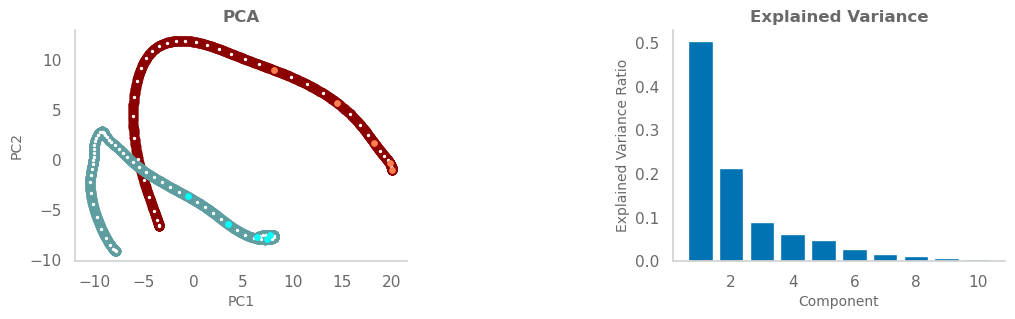

In [66]:
expTime_S = np.array([480, 560, 640, 720, 800])
expTime_L = np.array([800, 900, 1000, 1100, 1200])

fig = plt.figure(figsize = (12,3))
fig.subplots_adjust(wspace = 0.8)

plt.subplot(121)

plt.scatter(data_t[:800, 0], data_t[:800, 1], color = 'darkred')
plt.scatter(data_t[800:, 0], data_t[800:, 1], color = 'cadetblue')
##
# Visualizing 'speed'
plt.scatter(data_t[np.arange(0, 800, 20), 0], data_t[np.arange(0, 800, 20), 1], s = 2, color = 'white')
plt.scatter(data_t[np.arange(800, 2000, 20), 0], data_t[np.arange(800, 2000, 20), 1], s = 2, color = 'white')

plt.scatter(data_t[expTime_S - 1, 0], data_t[expTime_S - 1, 1], s = 15, color = 'coral')
plt.scatter(data_t[expTime_L + 799, 0], data_t[expTime_L + 799, 1], s = 15, color = 'cyan')
##


plt.title('PCA', fontweight = 'bold')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend(loc = 'center', bbox_to_anchor = (1.15, 0.5), title = 'Direction', frameon = False)

plt.subplot(122)
plt.bar([i + 1 for i in range(nComponents)], pca.explained_variance_ratio_)
plt.title('Explained Variance', fontweight = 'bold')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [96]:
np.isnan(allSpikes).T.sum(axis = 1)

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2000,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [104]:
shortMask = allData['id_short'][4]
shortData = allData['D'][4][:, :, shortMask][:800, :, :]
shortData_mean = np.nanmean(shortData, axis = 2)

/var/folders/s_/pxysblfd2c3b2zzbj_9krgk80000gp/T/ipykernel_13185/422962639.py:3: RuntimeWarning:

Mean of empty slice



In [111]:
shortData_mean[:, ]

(800, 105)

In [110]:
np.isnan(shortData_mean.sum(axis = 0))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [122]:
np.array([i for i in range(3)])

array([0, 1, 2])

In [114]:
spikesL.shape

(3, 1200)

In [124]:
shortData_mean.shape

(800, 104)

/var/folders/s_/pxysblfd2c3b2zzbj_9krgk80000gp/T/ipykernel_13185/3453477812.py:17: RuntimeWarning:

Mean of empty slice

/var/folders/s_/pxysblfd2c3b2zzbj_9krgk80000gp/T/ipykernel_13185/3453477812.py:18: RuntimeWarning:

Mean of empty slice



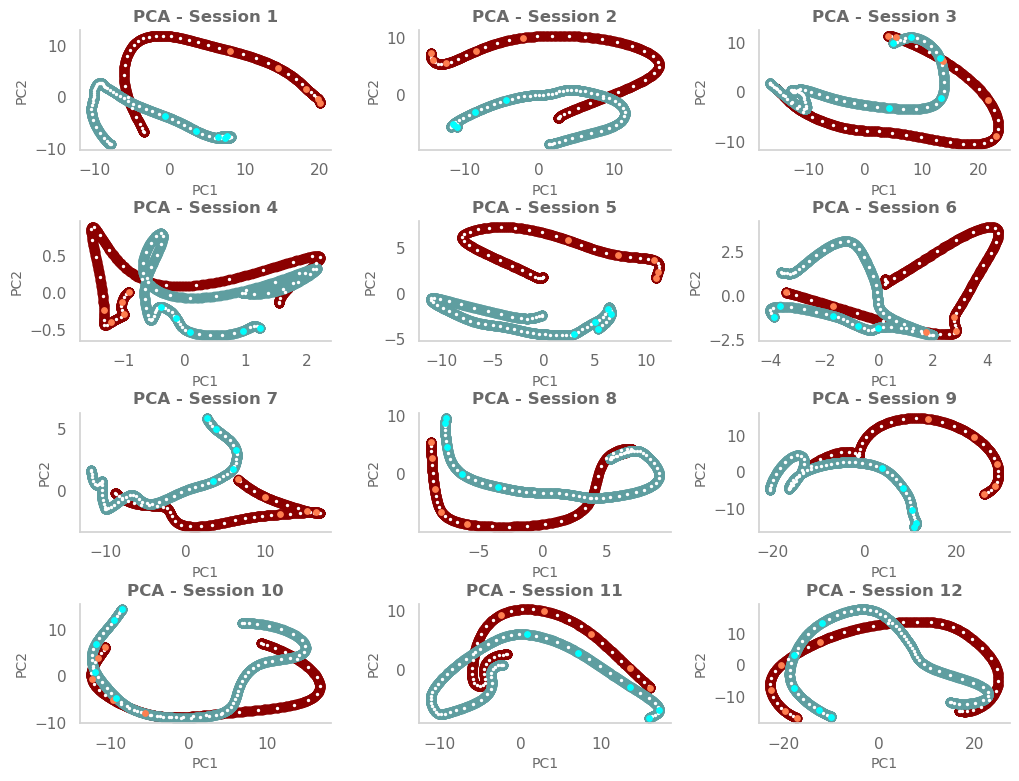

In [130]:
fig, axs = plt.subplots(4, 3, figsize=(12, 9))
fig.subplots_adjust(hspace = 0.6, wspace = 0.35)

for session, ax in enumerate(axs.ravel()):
    nTime, nNeurons, nTrials = allData['D'][session].shape
    ## Masks for ts
    shortMask = allData['id_short'][session]
    longMask = allData['id_short'][session] == False

    ##Subset Data according to short or long ts
    #### Short
    shortData = allData['D'][session][:, :, shortMask][:800, :, :] ## Slice at time 800 since after that, there are no data -> NaN's
    #### Long
    longData = allData['D'][session][:, :, longMask]

    # Average data across trials
    shortData_mean = np.nanmean(shortData, axis = 2)
    longData_mean = np.nanmean(longData, axis = 2)

    ## Remove NaN neurons
    nanShort = np.isnan(shortData_mean.sum(axis = 0)) == False
    nanLong = np.isnan(longData_mean.sum(axis = 0)) == False

    shortData_mean = shortData_mean[:, nanShort]
    longData_mean = longData_mean[:, nanLong]


    ## Get smothed of firing rates
    N = 50
    spikesS = [rollavg(shortData_mean[:, neuron], N = N, gaussian = True)[1] * 1000 for neuron in range(shortData_mean.shape[1])]
    spikesL = [rollavg(longData_mean[:, neuron], N = N, gaussian = True)[1] * 1000 for neuron in range(longData_mean.shape[1])]
    spikesS = np.array(spikesS)
    spikesL = np.array(spikesL)
    allSpikes = np.hstack([spikesS, spikesL]).T

    ## PCA
    scaler = StandardScaler()
    allSpikes_scaled = scaler.fit_transform(allSpikes) 

    nComponents = 2
    pca = PCA(n_components = nComponents)
    pca.fit(allSpikes)

    # Transform the scaled data to the principal components
    data_t = pca.transform(allSpikes)

    ## Visualize
    ax.scatter(data_t[:800, 0], data_t[:800, 1], color = 'darkred')
    ax.scatter(data_t[800:, 0], data_t[800:, 1], color = 'cadetblue')
    ##
    # Visualizing 'speed'
    ax.scatter(data_t[np.arange(0, 800, 20), 0], data_t[np.arange(0, 800, 20), 1], s = 2, color = 'white')
    ax.scatter(data_t[np.arange(800, 2000, 20), 0], data_t[np.arange(800, 2000, 20), 1], s = 2, color = 'white')

    ax.scatter(data_t[expTime_S - 1, 0], data_t[expTime_S - 1, 1], s = 15, color = 'coral')
    ax.scatter(data_t[expTime_L + 799, 0], data_t[expTime_L + 799, 1], s = 15, color = 'cyan')

    ax.set_title('PCA - Session {}'.format(session + 1), fontweight = 'bold')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ##

    

## Standardizing features

/var/folders/s_/pxysblfd2c3b2zzbj_9krgk80000gp/T/ipykernel_13185/1084113825.py:17: RuntimeWarning:

Mean of empty slice

/var/folders/s_/pxysblfd2c3b2zzbj_9krgk80000gp/T/ipykernel_13185/1084113825.py:18: RuntimeWarning:

Mean of empty slice



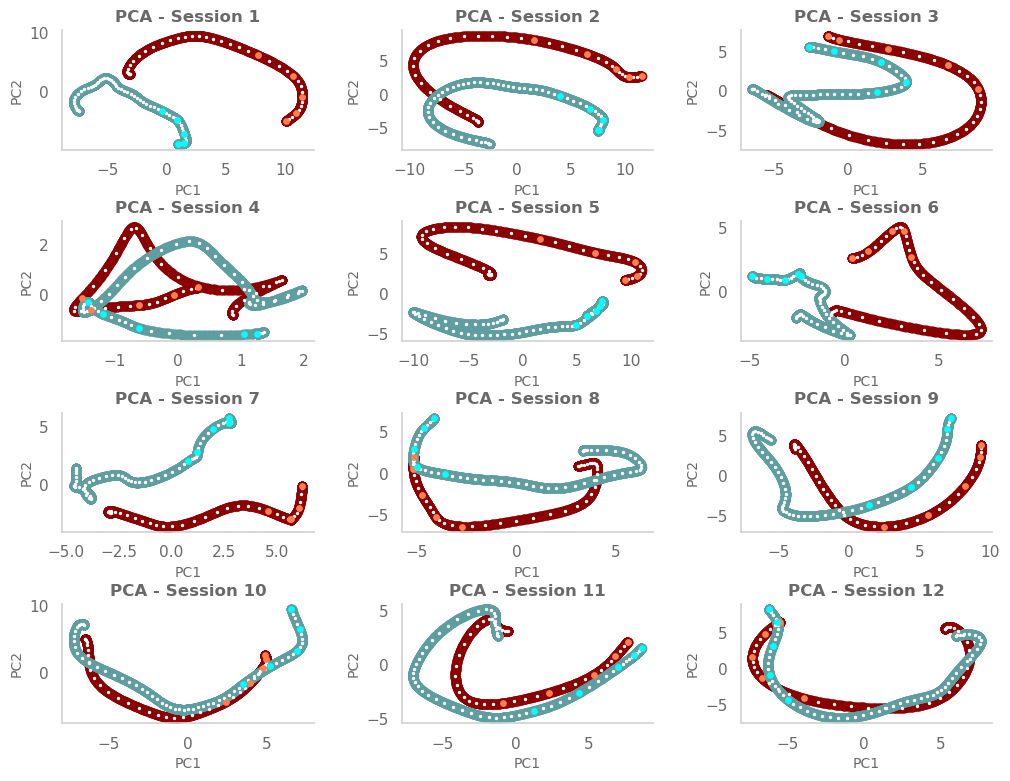

In [129]:
fig, axs = plt.subplots(4, 3, figsize=(12, 9))
fig.subplots_adjust(hspace = 0.6, wspace = 0.35)

for session, ax in enumerate(axs.ravel()):
    nTime, nNeurons, nTrials = allData['D'][session].shape
    ## Masks for ts
    shortMask = allData['id_short'][session]
    longMask = allData['id_short'][session] == False

    ##Subset Data according to short or long ts
    #### Short
    shortData = allData['D'][session][:, :, shortMask][:800, :, :] ## Slice at time 800 since after that, there are no data -> NaN's
    #### Long
    longData = allData['D'][session][:, :, longMask]

    # Average data across trials
    shortData_mean = np.nanmean(shortData, axis = 2)
    longData_mean = np.nanmean(longData, axis = 2)

    ## Remove NaN neurons
    nanShort = np.isnan(shortData_mean.sum(axis = 0)) == False
    nanLong = np.isnan(longData_mean.sum(axis = 0)) == False

    shortData_mean = shortData_mean[:, nanShort]
    longData_mean = longData_mean[:, nanLong]


    ## Get smothed of firing rates
    N = 50
    spikesS = [rollavg(shortData_mean[:, neuron], N = N, gaussian = True)[1] * 1000 for neuron in range(shortData_mean.shape[1])]
    spikesL = [rollavg(longData_mean[:, neuron], N = N, gaussian = True)[1] * 1000 for neuron in range(longData_mean.shape[1])]
    spikesS = np.array(spikesS)
    spikesL = np.array(spikesL)
    allSpikes = np.hstack([spikesS, spikesL]).T

    ## PCA
    scaler = StandardScaler()
    allSpikes_scaled = scaler.fit_transform(allSpikes) 

    nComponents = 2
    pca = PCA(n_components = nComponents)
    pca.fit(allSpikes_scaled)

    # Transform the scaled data to the principal components
    data_t = pca.transform(allSpikes_scaled)

    ## Visualize
    ax.scatter(data_t[:800, 0], data_t[:800, 1], color = 'darkred')
    ax.scatter(data_t[800:, 0], data_t[800:, 1], color = 'cadetblue')
    ##
    # Visualizing 'speed'
    ax.scatter(data_t[np.arange(0, 800, 20), 0], data_t[np.arange(0, 800, 20), 1], s = 2, color = 'white')
    ax.scatter(data_t[np.arange(800, 2000, 20), 0], data_t[np.arange(800, 2000, 20), 1], s = 2, color = 'white')

    ax.scatter(data_t[expTime_S - 1, 0], data_t[expTime_S - 1, 1], s = 15, color = 'coral')
    ax.scatter(data_t[expTime_L + 799, 0], data_t[expTime_L + 799, 1], s = 15, color = 'cyan')

    ax.set_title('PCA - Session {}'.format(session + 1), fontweight = 'bold')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ##

    

<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

## Decoding (attemp 1)

In [167]:
session = 0
nTime, nNeurons, nTrials = allData['D'][session].shape
## Masks for ts
shortMask = allData['id_short'][session]
longMask = allData['id_short'][session] == False

##Subset Data according to short or long ts
#### Short
shortData = allData['D'][session][:, :, shortMask][:800, :, :] ## Slice at time 800 since after that, there are no data -> NaN's
#### Long
longData = allData['D'][session][:, :, longMask]

In [177]:
ts_short = allData['t_s'][session][shortMask]
ts_long = allData['t_s'][session][longMask]

In [245]:
shortDict = {'480': 1, '560': 2, '640': 3, '720': 4, '800': 5}
longDict = {'800': 1, '900': 2, '1000': 3, '1100': 4, '1200': 5}

In [251]:
classes_short = [shortDict[str(int(ts))] for ts in ts_short]
classes_long = [longDict[str(int(ts))] for ts in ts_long]

In [178]:
set(allData['t_s'][session])

{480.0, 560.0, 640.0, 720.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0}

In [538]:
window = 480
meanFiring_overTime_short = []
meanFiring_overTime_long = []


for index, ts in enumerate(ts_short):
    #meanFiring = np.sum(shortData[int(ts / 2):int(ts), :, index], axis = 0)
    meanFiring = np.mean(shortData[int(ts - window):int(ts), :, index], axis = 0) * ts
    meanFiring[np.isnan(meanFiring)] = 0
    meanFiring_overTime_short.append(meanFiring)

    
for index, ts in enumerate(ts_long):
    #meanFiring = np.sum(longData[int(ts / 2):int(ts), :, index], axis = 0)
    meanFiring = np.mean(longData[int(ts - window):int(ts), :, index], axis = 0) * ts
    meanFiring[np.isnan(meanFiring)] = 0
    meanFiring_overTime_long.append(meanFiring)
    
    
meanFiring_overTime_short = np.array(meanFiring_overTime_short)
meanFiring_overTime_long = np.array(meanFiring_overTime_long)

<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

In [550]:
N_input = 256 # dimension of X_input
n_classes = 10 # number of classes
N_batch = 4
seed = 1973 # release year of https://en.wikipedia.org/wiki/Ring_Ring_(ABBA_song)

np.random.seed(seed)
W = np.random.randn(N_input+1, n_classes) # FIXED design matrix

def psychometric_function(W, X_input):
    # print(W.shape, X_input.shape)
    logit = (X_input @ W[:-1, :]) + W[-1, :]
    return 1 / (1 + np.exp(-logit))

def get_data(W, seed, N_batch):
    N_input, n_classes = W.shape[0]-1, W.shape[1]
    np.random.seed(seed)
    X_input = np.random.randn(N_batch, N_input)
    p = psychometric_function(W, X_input)
    y = p > np.random.rand(N_batch, n_classes)  # generate data
    return X_input, p, y

X_input, p, y = get_data(W, seed, N_batch)
X_input.shape, y.shape

((4, 256), (4, 10))

<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

In [554]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [557]:
y = classes_short
# y = classes_long

In [558]:
X_train, X_val, y_train, y_val = train_test_split(meanFiring_overTime_short, y, test_size = 0.2, random_state = 42)

In [542]:
# X_train, X_val, y_train, y_val = train_test_split(meanFiring_overTime_long, y, test_size = 0.2, random_state = 42)

In [543]:
clf = LogisticRegression(random_state = 42, max_iter = 10000, penalty = 'l1', solver = 'saga', C = 3, multi_class = 'multinomial').fit(X_train, y_train)

In [544]:
clf.predict(X_val)

array([3, 2, 4, 4, 5, 2, 2, 3, 2, 5, 3, 4, 3, 3, 4, 1, 5, 3, 3, 1, 4, 4,
       5, 5, 5, 5, 5, 2, 4, 2, 5, 3, 3, 5, 1, 3, 1, 1, 1, 4, 1, 1, 4, 5,
       4, 4, 4, 2, 3, 2, 5, 2, 3, 1, 5, 5, 5, 5, 3, 3, 3, 4, 2, 3, 3, 1,
       4, 4, 2, 2, 3, 3, 2, 5, 4, 3, 3, 4, 2, 3, 2, 3, 3, 5, 1, 2, 2, 4,
       3, 1, 2, 3, 5, 2, 2, 4, 1, 4, 1, 1, 2, 3, 3, 2, 2, 3, 1, 2, 3, 4,
       1, 3, 5, 3, 1, 3, 4, 5, 4, 2, 4, 4, 5, 5, 4, 4, 4, 4, 5, 5, 5, 4,
       3, 5, 3, 4, 1, 5, 2, 3, 5, 5, 1, 2, 3, 4, 5, 1])

In [545]:
np.array(y_val)

array([3, 1, 5, 5, 5, 1, 2, 3, 3, 5, 2, 5, 4, 5, 3, 1, 5, 3, 2, 1, 4, 5,
       3, 4, 5, 3, 4, 2, 4, 3, 5, 2, 2, 5, 1, 1, 1, 1, 3, 3, 2, 3, 4, 3,
       4, 4, 3, 1, 3, 3, 5, 2, 4, 1, 4, 5, 4, 5, 3, 2, 4, 2, 2, 2, 2, 1,
       5, 5, 1, 2, 5, 3, 1, 5, 3, 2, 3, 4, 3, 3, 2, 3, 3, 5, 2, 3, 2, 4,
       4, 1, 3, 3, 5, 3, 2, 5, 1, 4, 1, 1, 2, 5, 4, 2, 2, 4, 1, 3, 3, 4,
       2, 5, 5, 3, 1, 3, 5, 5, 2, 3, 3, 3, 2, 5, 4, 3, 5, 5, 5, 4, 3, 3,
       4, 5, 2, 3, 1, 5, 1, 4, 3, 5, 5, 3, 4, 3, 4, 1])

In [546]:
clf.score(X_val, y_val)

0.46621621621621623

In [425]:
clf.predict(meanFiring_overTime_long)

array([2, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 2, 4, 5, 5, 1, 4, 1,
       5, 4, 5, 5, 5, 5, 5, 5, 2, 4, 5, 4, 4, 4, 5, 1, 5, 2, 5, 5, 4, 1,
       5, 5, 5, 4, 1, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 1, 1, 5, 4, 1, 5, 1,
       5, 5, 4, 5, 4, 4, 5, 4, 2, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5,
       5, 1, 3, 2, 4, 5, 5, 2, 5, 3, 3, 2, 5, 3, 5, 5, 5, 4, 5, 5, 2, 5,
       5, 2, 5, 1, 4, 5, 5, 5, 2, 5, 2, 1, 4, 4, 4, 4, 3, 4, 5, 5, 5, 5,
       2, 2, 5, 4, 1, 1, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 3, 5, 5, 5, 5, 5,
       1, 1, 2, 1, 5, 2, 4, 4, 1, 2, 3, 4, 4, 2, 4, 4, 5, 5, 4, 4, 5, 5,
       5, 1, 5, 1, 2, 1, 1, 5, 5, 5, 5, 2, 5, 5, 5, 4, 5, 5, 1, 5, 5, 1,
       5, 5, 4, 1, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 1, 1, 5, 4, 1, 3, 2, 2,
       2, 2, 5, 2, 3, 1, 5, 2, 2, 1, 1, 1, 2, 1, 1, 4, 3, 2, 5, 2, 4, 5,
       3, 1, 5, 1, 3, 1, 5, 4, 1, 1, 1, 1, 2, 5, 5, 5, 1, 5, 4, 1, 5, 4,
       5, 5, 5, 5, 5, 1, 4, 5, 1, 5, 2, 5, 4, 5, 4, 4, 5, 5, 1, 1, 5, 2,
       5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 5, 4, 2, 5,

In [547]:
# Can ir predict the class for long?
f1_score(classes_long, clf.predict(meanFiring_overTime_long), average = 'micro')

0.3007915567282322

In [548]:
# Can ir predict the class for long?
f1_score(classes_short, clf.predict(meanFiring_overTime_short), average = 'micro')

0.727027027027027

In [549]:
sum(clf.predict(X_val) == y_val)/len(y_val)

0.46621621621621623

In [559]:
scores = cross_val_score(clf, meanFiring_overTime_short, y, cv = 3, scoring='f1_micro')

In [560]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.36 accuracy with a standard deviation of 0.05


<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

## By 'windows'

In [47]:
spikes_short_df = {}
spikes_long_df = {}

for start in shortTimes:
    spikes_short_df[start] = shortData_mean[start - dt: start, :].mean(axis = 0) * 1000 # 0 - avgTime 

for start in longTimes:
    spikes_long_df[start] = longData_mean[start - dt: start, :].mean(axis = 0) * 1000 # 1 - avgNeuronActivity
    
spikes_short_df = pd.DataFrame(spikes_short_df)
spikes_long_df = pd.DataFrame(spikes_long_df)

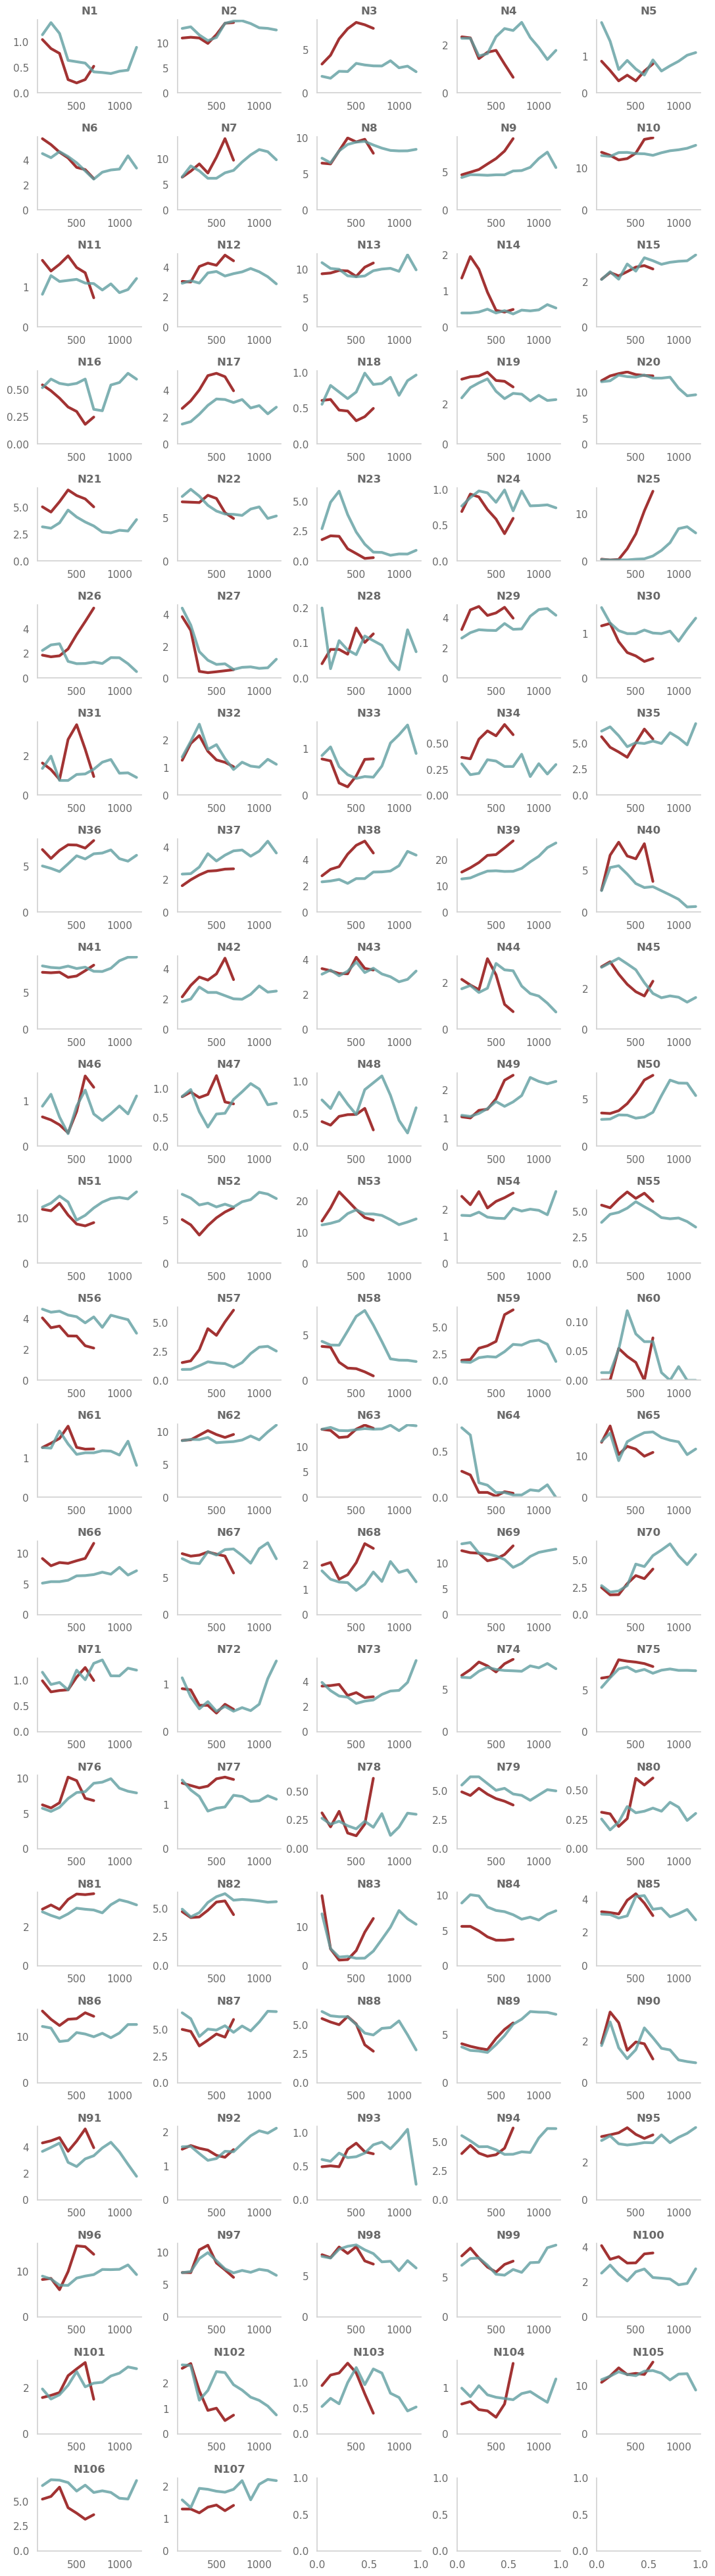

In [48]:
N_neurons_cols = int(np.sqrt(nNeurons)/2)
# fig, axs = plt.subplots(nNeurons // N_neurons_cols, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))

fig, axs = plt.subplots(22, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))
fig.subplots_adjust(hspace = 0.6, wspace = 0.35)
for neuron, ax in enumerate(axs.ravel()):
    if neuron > nNeurons - 1:
        break
    ax.plot(shortTimes, spikes_short_df.T[neuron], color = 'darkred', alpha = 0.8, linewidth = 3)
    ax.plot(longTimes, spikes_long_df.T[neuron], color = 'cadetblue', alpha = 0.8, linewidth = 3)
    # ax.plot(timepoints, np.nanmean(fr[:, i_neuron, longMask], axis = -1), 'b')
    ax.set_title('N{}'.format(neuron + 1), fontweight = 'bold')
    ax.set_ylim(0)

<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

## Laurent

In [49]:
DeltaT = 100 # number of time bins on which we average
dt = 60 # temporal distance between points on which we compute the firing rate

t_s_max = np.max(allData['t_s'][session])
timepoints = np.arange(DeltaT, t_s_max + 1, dt, dtype = int)
N_timepoints = len(timepoints)
timepoints

array([ 100,  160,  220,  280,  340,  400,  460,  520,  580,  640,  700,
        760,  820,  880,  940, 1000, 1060, 1120, 1180])

In [50]:
data.shape

NameError: name 'data' is not defined

In [ ]:
fr = np.empty((N_timepoints, nNeurons, nTrials)) * np.nan
for i_timepoint, timepoint in enumerate(timepoints):
    fr[i_timepoint, :, :] = np.nansum(data[(timepoint - DeltaT) : timepoint, :, :], axis = 0) / (DeltaT/1000)

In [ ]:
N_neurons_cols = int(np.sqrt(nNeurons)/2)
# fig, axs = plt.subplots(nNeurons // N_neurons_cols, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))

fig, axs = plt.subplots(22, N_neurons_cols, figsize=(13, 5 * int(np.sqrt(nNeurons))))
fig.subplots_adjust(hspace = 0.6, wspace = 0.35)
for i_neuron, ax in enumerate(axs.ravel()):
    if i_neuron > nNeurons - 1:
        break
    ax.plot(timepoints, np.nanmean(fr[:, i_neuron, :], axis = -1), 'k', alpha=.5)
    ax.plot(timepoints, np.nanmean(fr[:, i_neuron, shortMask], axis = -1), 'r')
    ax.plot(timepoints, np.nanmean(fr[:, i_neuron, longMask], axis = -1), 'b')
    ax.set_title('N{}'.format(i_neuron + 1), fontweight = 'bold')
    ax.set_ylim(0)

In [ ]:
fr.shape

In [ ]:
timepoints

<div style="background-color:#B43757; color:white; padding:10px;">
<left>
</div>

## ...

In [ ]:
plt.imshow(allData['D'][session][:, :, 0].T)
plt.ylabel('Neurons')
plt.xlabel('Time')
plt.title('Activity?', fontweight = 'bold')
plt.show()

In [ ]:
for iSession in range(sessions):
    print(iSession, np.nanmax(allData['D'][iSession]))

**Make a summary plot with a subplot for each neuron showing the trial-averaged activity of the neuron as a function of time. Use 20-ms non-overlapping windows to bin the spikes**

In [ ]:
data = allData['D'][session]

In [ ]:
data.shape

In [ ]:
np.nanmean(data[:, 0, :], axis = 1)

In [ ]:
np.nansum((data[:, 0, 2]))

In [ ]:
# Why two sequential trimming 

In [ ]:
i_trial = 5
data_trimT = data[np.isnan(data[:, :, i_trial]).sum(axis=1) < nNeurons, :, i_trial]
data_trimT.shape

data_trim = data_trimT[:, np.isnan(data_trimT).sum(axis=0)==0]
data_trim.shape

fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow((data_trim>0)[:300, :].T, cmap='gray');